In [31]:
#import basics
import sys
import os
import numpy as np
import pandas as pd
from scipy import stats
basedir='/Users/bono/Desktop/gm2FieldAnalysis/MuonConvolution/'


#import the relevant synthesis tools
path = basedir + 'synthesis'
sys.path.insert(0,path)
from spacial_tools import moments_method as mm
from basic_grid_tools import plot_grid

path = basedir + 'field_info'
sys.path.insert(0,path)
from format_field import get_field_df

In [32]:
#load what's needed
path= basedir + 'tracker_info'
sys.path.append(path)
from beam_moments import *
from transform_beam import *
from beam_moments import get_normalized_distribution_moments as gndm

In [33]:
#for now, import a single file to represent all of run 1
tracker_file = basedir + 'tracker_info/sample_data/beamSpot.txt'
#get the raw info
df_tr = get_df_tracker(file=tracker_file)

In [34]:
from apply_tracker_corrections import basic_tracker_correction

In [35]:
df_tr_cor = basic_tracker_correction(df_tr)

applying shift
applying station avg
no acceptance corrections right now
no deconvolution right now


In [36]:
df_tr_cor['norm_counts'] = df_tr_cor['counts']/df_tr_cor['counts'].sum()

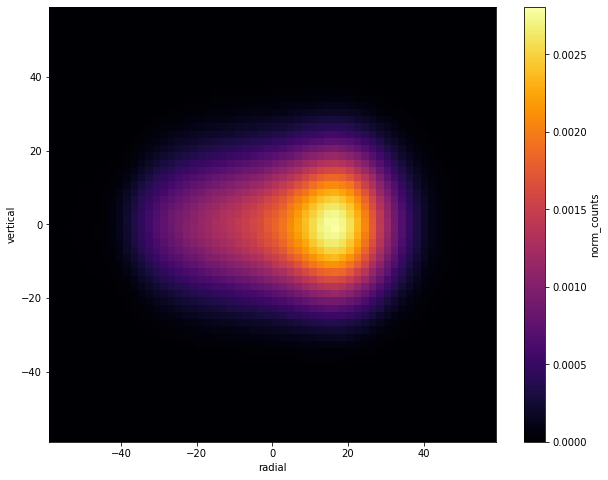

In [37]:
plot_grid(df=df_tr_cor,xvar='radial',yvar='vertical',zvar='norm_counts')

In [38]:
x = df_tr_cor['radial']
y = df_tr_cor['vertical']
weights = df_tr_cor['counts']
N_moments = 5
I_norm, J_norm = gndm(N_moments,x,y,weights)
print(I_norm)
print(J_norm)

[1.00000000e+00 1.27368314e-01 9.81133617e-02 1.30311712e-04
 3.98041497e-03]
[0.         0.00338226 0.0016475  0.00127479 0.00016763]


In [39]:
#import the relevant field moments functions
path = basedir + 'field_info'
sys.path.insert(0,path)
from format_field import field_team_to_standard_moments as ftts
from field_grid import get_field_grid

In [40]:
path = basedir + 'field_info/data/run1/all_multipoles/run1_v00/'
flist = ['60Hr_vals_uncertainties_3956-3997.pkl',
'HighKick_vals_uncertainties_4058-4098.pkl',
'HighKick_vals_uncertainties_4098-4138.pkl',
'9day_vals_uncertainties_4138-4181.pkl',
'9day_vals_uncertainties_4226-4265.pkl',
'9day_vals_uncertainties_4265-4493.pkl',
'endgame_vals_uncertainties_5054-5103.pkl',
'endgame_vals_uncertainties_5117-5157.pkl',
'endgame_vals_uncertainties_5169-5217.pkl',
'endgame_vals_uncertainties_5217-5259.pkl']



In [47]:
f = flist[5]
df = pd.read_pickle(path + f)
total_ctags = df["ctags"].sum()
b = [
    (df["D"]*df["ctags"]).sum()/total_ctags,
    (df["NQ"]*df["ctags"]).sum()/total_ctags,
    (df["SQ"]*df["ctags"]).sum()/total_ctags,
    (df["NS"]*df["ctags"]).sum()/total_ctags,
    (df["SS"]*df["ctags"]).sum()/total_ctags,
    (df["NO"]*df["ctags"]).sum()/total_ctags,
    (df["NO"]*df["ctags"]).sum()/total_ctags,
    (df["ND"]*df["ctags"]).sum()/total_ctags,
    (df["ND"]*df["ctags"]).sum()/total_ctags]

b[0] = 0

In [48]:
df_field_grid = get_field_grid(b)
df_field_grid.head()

,x,y,B
0,-59.0,-59.0,-1.024718
1,-59.0,-57.0,-1.108473
2,-59.0,-55.0,-1.191445
3,-59.0,-53.0,-1.273631
4,-59.0,-51.0,-1.355021


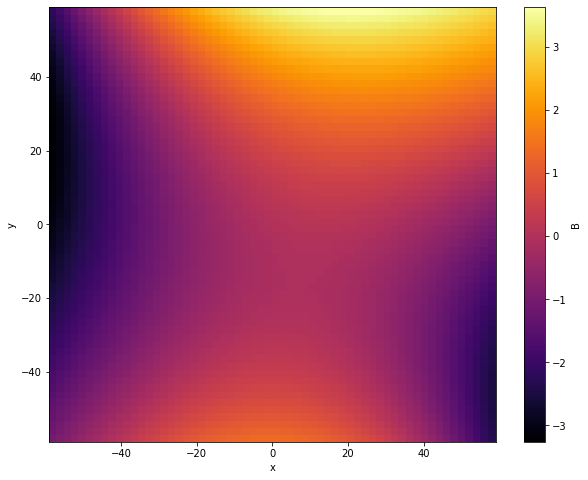

In [49]:
plot_grid(df=df_field_grid,xvar='x',yvar='y',zvar='B')

In [50]:
df_field_grid['product'] = df_field_grid['B']*df_tr_cor['norm_counts']

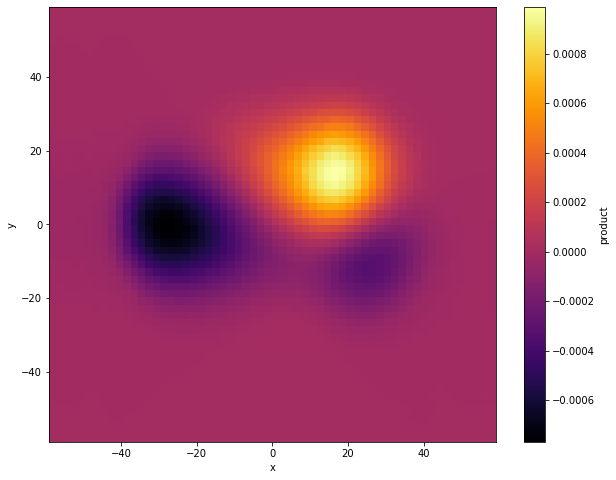

In [51]:
plot_grid(df=df_field_grid,xvar='x',yvar='y',zvar='product')